In [ ]:
#Examplary demonstration of a RBM using MNIST dataset with scikit/s RBM. 
#New samples generated with Gibbs sampling.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
import pandas as pd

In [5]:
def gen_mnist_image(X):
    return np.rollaxis(np.rollaxis(X[0:200].reshape(20, - 1, 28, 28), 0, 2), 1, 3).reshape(- 1, 20 * 28)

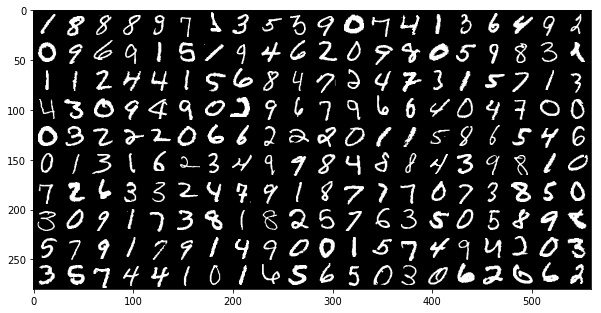

In [7]:
X_train = pd.read_csv('/Users/JoonH/Desktop/Kaggle_data/digits_train.csv').values[:, 1:]
X_train = (X_train - np.min(X_train, 0)) / (np.max(X_train, 0) + 0.0001) # scaled to 0 ~ 1

plt.figure(figsize = (10, 20))
plt.imshow(gen_mnist_image(X_train))

In [9]:
from sklearn.neural_network import BernoulliRBM
#bernoulliRBM is good for 0~1 scale

rbm = BernoulliRBM(n_components = 100, learning_rate = 0.01, random_state = 0, verbose = True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -119.88, time = 4.09s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -104.69, time = 4.39s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -97.89, time = 4.36s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -92.82, time = 4.45s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -90.63, time = 4.52s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -87.92, time = 4.53s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -86.04, time = 4.36s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -85.52, time = 4.48s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -84.60, time = 4.39s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -83.07, time = 4.49s


BernoulliRBM(batch_size=10, learning_rate=0.01, n_components=100, n_iter=10,
       random_state=0, verbose=True)

In [11]:
xx = X_train[:40].copy()
for ii in range(1000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

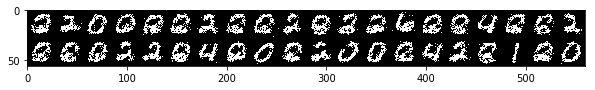

In [12]:
plt.figure(figsize = (10,20))
plt.imshow(gen_mnist_image(xx))

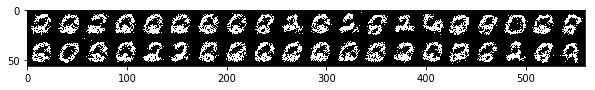

In [13]:
xx = X_train[:40].copy()
for ii in range(10000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])
        
plt.figure(figsize = (10,20))
plt.imshow(gen_mnist_image(xx))

Text(0.5,0.98,'100 components extracted by RBM')

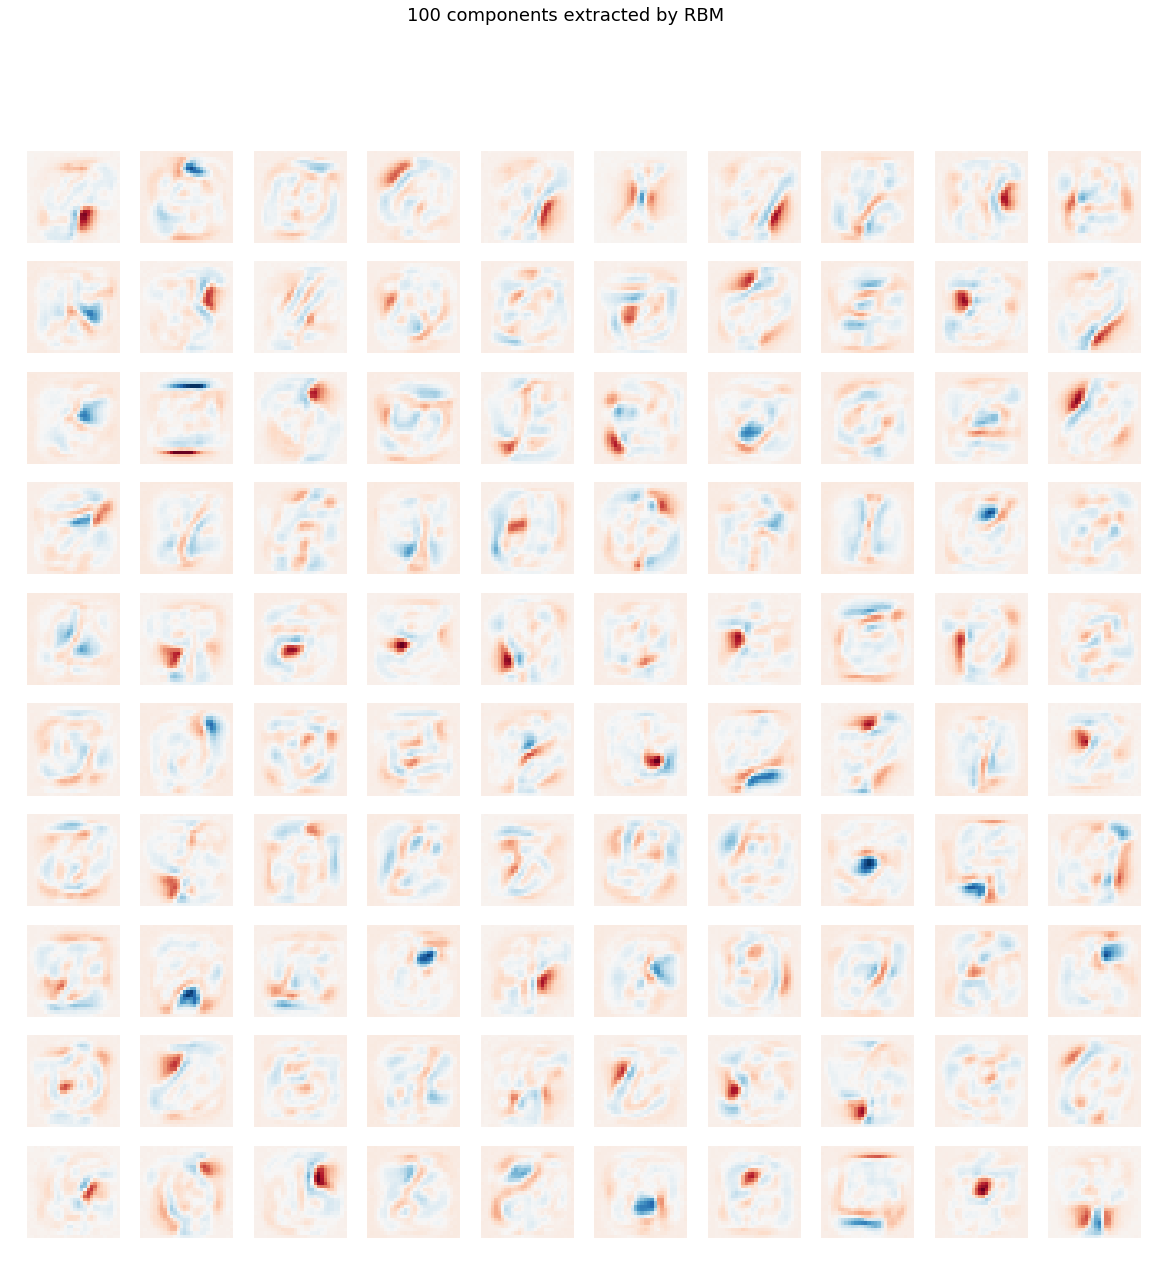

In [14]:
plt.figure(figsize = (20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap = plt.cm.RdBu, interpolation = 'nearest', vmin = - 2.5, vmax = 2.5)
    plt.axis('off')
    
plt.suptitle('100 components extracted by RBM', fontsize = 18)